In [57]:
# Importing packages
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import mapclassify
import folium

# Filepaths
grid_fp = r'data/dataE5/Vaestotietoruudukko_2015.shp'
roads_fp = r'data/dataE5/roads.shp'
metro_fp = r'data/dataE5/metro.shp'

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [60]:
# Reproject geometries to EPSG 4326 based on the grid crs:
grid = grid.to_crs(epsg=4326)
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)

In [62]:
# Selecting columns to use
grid = grid[['INDEX', 'ASUKKAITA', 'ASVALJYYS', 'geometry']]
grid['geoid'] = grid.index.astype(str)

<AxesSubplot:>

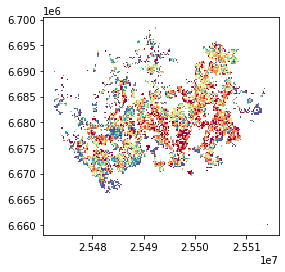

In [41]:
grid.plot(column='ASVALJYYS', cmap='Spectral', scheme='quantiles', k=9)

In [47]:
# Creating map instance
m = folium.Map(location=[60.25, 24.8], zoom_start=10, control_scale=True)

In [48]:
# File path
points_fp = r'data/dataE5/addresses.shp'
# Read the data
points = gpd.read_file(points_fp)
# Convert points to GeoJSON
point_gjson = folium.features.GeoJson(points, name='PT stations')

In [49]:
# Plot a choropleth map
folium.Choropleth(geo_data=data,
                  data=data,
                  columns=['geoid', 'ASVALJYYS'],
                  key_on='feature.id',
                  fill_color='YlOrRd',
                  line_weight=0
                ).add_to(m)

# Add points to the map instance
point_gjson.add_to(m)

# Importing package
from folium.plugins import MarkerCluster

#Layer control
folium.LayerControl().add_to(m)